In [1]:
# Data handling
import pandas as pd
import numpy as np

# Models
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.multioutput import MultiOutputRegressor

model1 = DecisionTreeRegressor()
mlp = MLPRegressor(hidden_layer_sizes=(256, 128), max_iter=500, random_state=42)
model2 = MultiOutputRegressor(mlp)
MultiOutputRegressor(DecisionTreeRegressor())


# Evaluation
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold

# Plotting
import matplotlib.pyplot as plt
%matplotlib inline

# Image processing (for Section B)
from skimage import io
from skimage.transform import resize


In [2]:
#Decision Tree

In [3]:
df = pd.read_csv('Section A/Dataset A/partA.csv')
inputs = df.filter(like='in_')
outputs = df.filter(like='out_')

In [4]:
df.head()

,in_0,in_1,in_2,in_3,in_4,in_5,in_6,in_7,in_8,in_9,...,out_15,out_16,out_17,out_18,out_19,out_20,out_21,out_22,out_23,out_24
0,0.374540,0.950714,0.731994,0.598658,0.156019,0.155995,0.058084,0.866176,0.601115,0.708073,...,0.934787,0.245392,0.382127,0.728791,0.645817,1.096032,0.309589,0.415274,1.031471,0.708416
1,0.122038,0.495177,0.034389,0.909320,0.258780,0.662522,0.311711,0.520068,0.546710,0.184854,...,1.984559,1.210861,1.567987,1.219904,1.676478,0.412849,0.311536,0.254893,0.199682,0.287938
2,0.863103,0.623298,0.330898,0.063558,0.310982,0.325183,0.729606,0.637557,0.887213,0.472215,...,0.817545,1.235656,1.472125,1.579108,1.488328,0.224400,0.598936,0.531115,0.480508,0.581618
3,0.807440,0.896091,0.318003,0.110052,0.227935,0.427108,0.818015,0.860731,0.006952,0.510747,...,1.062463,0.679100,0.612095,0.591760,1.292959,1.090738,1.299439,1.404177,0.601195,1.409746
4,0.367783,0.632306,0.633530,0.535775,0.090290,0.835302,0.320780,0.186519,0.040775,0.590893,...,0.445099,0.948648,1.336631,1.132381,0.541586,0.626131,1.334735,1.820442,1.526060,0.696583


In [5]:
inputs.head()

,in_0,in_1,in_2,in_3,in_4,in_5,in_6,in_7,in_8,in_9,...,in_30,in_31,in_32,in_33,in_34,in_35,in_36,in_37,in_38,in_39
0,0.374540,0.950714,0.731994,0.598658,0.156019,0.155995,0.058084,0.866176,0.601115,0.708073,...,0.607545,0.170524,0.065052,0.948886,0.965632,0.808397,0.304614,0.097672,0.684233,0.440152
1,0.122038,0.495177,0.034389,0.909320,0.258780,0.662522,0.311711,0.520068,0.546710,0.184854,...,0.772245,0.198716,0.005522,0.815461,0.706857,0.729007,0.771270,0.074045,0.358466,0.115869
2,0.863103,0.623298,0.330898,0.063558,0.310982,0.325183,0.729606,0.637557,0.887213,0.472215,...,0.289751,0.161221,0.929698,0.808120,0.633404,0.871461,0.803672,0.186570,0.892559,0.539342
3,0.807440,0.896091,0.318003,0.110052,0.227935,0.427108,0.818015,0.860731,0.006952,0.510747,...,0.908266,0.239562,0.144895,0.489453,0.985650,0.242055,0.672136,0.761620,0.237638,0.728216
4,0.367783,0.632306,0.633530,0.535775,0.090290,0.835302,0.320780,0.186519,0.040775,0.590893,...,0.093103,0.897216,0.900418,0.633101,0.339030,0.349210,0.725956,0.897110,0.887086,0.779876


In [6]:
outputs.head()

,out_0,out_1,out_2,out_3,out_4,out_5,out_6,out_7,out_8,out_9,...,out_15,out_16,out_17,out_18,out_19,out_20,out_21,out_22,out_23,out_24
0,1.904315,0.549261,0.704400,1.804635,1.185315,0.953447,0.326665,0.214177,0.797354,0.515738,...,0.934787,0.245392,0.382127,0.728791,0.645817,1.096032,0.309589,0.415274,1.031471,0.708416
1,1.005622,0.811063,0.565887,0.434456,0.652638,1.079981,0.626640,0.786164,0.582327,1.007130,...,1.984559,1.210861,1.567987,1.219904,1.676478,0.412849,0.311536,0.254893,0.199682,0.287938
2,0.333777,0.909507,1.061749,0.905694,1.075177,0.857850,0.961377,1.140714,1.391225,1.113267,...,0.817545,1.235656,1.472125,1.579108,1.488328,0.224400,0.598936,0.531115,0.480508,0.581618
3,1.125643,0.899676,0.981839,0.470871,0.873266,1.186450,1.092232,1.102114,0.695489,1.617012,...,1.062463,0.679100,0.612095,0.591760,1.292959,1.090738,1.299439,1.404177,0.601195,1.409746
4,0.788831,1.515830,1.742234,1.533939,0.880414,0.677081,1.116086,1.003415,0.890178,0.479525,...,0.445099,0.948648,1.336631,1.132381,0.541586,0.626131,1.334735,1.820442,1.526060,0.696583


In [7]:
x = inputs
y = outputs

In [8]:
model1.fit(x, y)
print("Model trained successfully.")


Model trained successfully.


In [9]:
prediction = model1.predict(x)
print(prediction)

[[1.90431456 0.54926101 0.70439954 ... 0.41527425 1.03147108 0.70841609]
 [1.00562151 0.81106278 0.56588729 ... 0.25489264 0.19968153 0.28793849]
 [0.3337768  0.90950679 1.06174854 ... 0.53111471 0.48050838 0.58161783]
 ...
 [0.56004825 0.49631465 0.91162685 ... 1.49509283 1.07284128 0.95691457]
 [0.71983963 0.63801386 0.91579779 ... 1.27838777 1.88683353 0.26978997]
 [0.5275387  0.55325106 0.18706945 ... 0.89475572 0.94889681 0.49990374]]


In [10]:
error = mean_squared_error(y, prediction)
print("MSE:", error)

MSE: 0.0


In [14]:
new_inputs_df = pd.read_csv('C:/Users/Navya Binoy/OneDrive/Desktop/Year1_Semester2/AI CW/Section A/Dataset A/new_input_data.csv')
new_outputs_df = pd.read_csv('C:/Users/Navya Binoy/OneDrive/Desktop/Year1_Semester2/AI CW/Section A/Dataset A/new_output_data.csv')
new_inputs = new_inputs_df.filter(like='in_')
new_outputs = new_outputs_df.filter(like='out_')

In [15]:
new_inputs.head()
new_outputs.head()

,out_0,out_1,out_2,out_3,out_4,out_5,out_6,out_7,out_8,out_9,...,out_15,out_16,out_17,out_18,out_19,out_20,out_21,out_22,out_23,out_24
0,0.727300,1.028565,1.160156,1.142125,1.056977,0.897257,1.481552,1.652197,1.694662,1.548057,...,0.564613,0.881406,1.162168,1.178800,0.894351,0.387464,0.675771,0.876411,0.927589,0.735787
1,0.704193,0.965763,0.683040,0.736457,0.885410,1.232750,1.675259,1.062034,1.133429,1.566381,...,0.662569,1.242402,0.773010,0.807256,1.037065,0.723003,1.823907,1.056875,1.125135,1.110425
2,1.011817,1.219681,0.714293,1.093672,0.941104,1.168828,1.481028,0.647518,1.136702,0.785905,...,1.257091,1.493090,0.921807,1.191818,1.292587,0.607445,0.722430,0.457017,0.561223,0.623187
3,0.347412,0.996972,1.395371,1.114022,1.011928,0.930965,1.573827,1.459248,1.682186,1.657887,...,0.880557,1.641572,0.951542,1.312119,1.690684,0.329899,0.995041,1.022724,0.908211,0.908579
4,1.035090,0.467978,0.787883,1.486910,0.677421,1.645246,0.349077,1.385396,1.896254,0.869884,...,1.416206,0.768364,1.066847,2.132079,0.922782,0.509937,0.311344,0.560194,0.662969,0.182225


In [16]:
new_prediction = model1.predict(new_inputs)
error = mean_squared_error(new_outputs, new_prediction)
print("New MSE: ", error)

New MSE:  0.30481061694096023


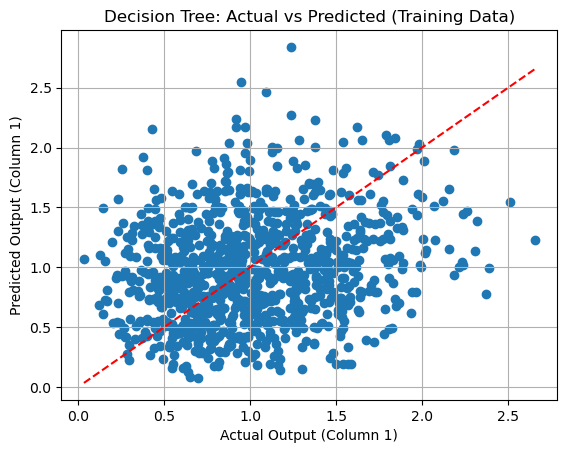

In [17]:
plt.scatter(new_outputs.iloc[:, 0], new_prediction[:, 0])
plt.grid(True)
plt.xlabel("Actual Output (Column 1)")
plt.ylabel("Predicted Output (Column 1)")
plt.title("Decision Tree: Actual vs Predicted (Training Data)")
plt.plot([min(new_outputs.iloc[:, 0]), max(new_outputs.iloc[:, 0])], 
         [min(new_outputs.iloc[:, 0]), max(new_outputs.iloc[:, 0])], 
         color='red', linestyle='--')  # Perfect prediction line
plt.show()


MSE values for each fold: [0.12503902 0.119994   0.12528506 0.12364432 0.12987321 0.13499505
 0.11989913 0.11793963 0.12440672 0.12600545]
Mean MSE: 0.12470815799105801


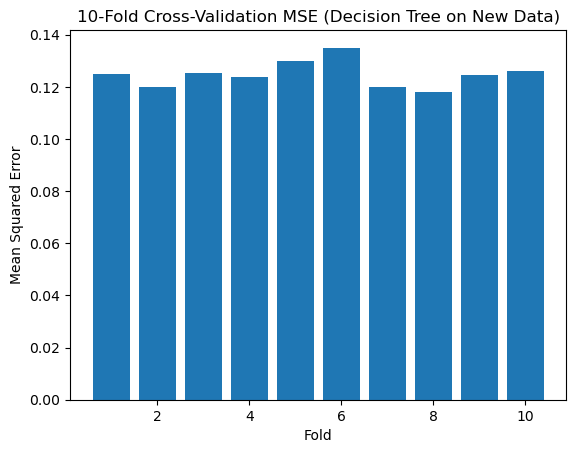

In [18]:
# Define K-Fold
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Wrap the DecisionTreeRegressor for multi-output
wrapped_model = MultiOutputRegressor(model1)

# Run cross-validation on new data
scores = cross_val_score(wrapped_model, new_inputs, new_outputs, cv=cv, scoring='neg_mean_squared_error')

# Convert to positive MSE
mse_scores = -scores

# Print scores
print(f'MSE values for each fold: {mse_scores}')
print(f'Mean MSE: {np.mean(mse_scores)}')

# Plot
plt.bar(range(1, 11), mse_scores)
plt.xlabel('Fold')
plt.ylabel('Mean Squared Error')
plt.title('10-Fold Cross-Validation MSE (Decision Tree on New Data)')
plt.show()


In [19]:
#MLP

In [20]:
MultiOutputRegressor(MLPRegressor(model2))

MultiOutputRegressor(estimator=MLPRegressor(hidden_layer_sizes=MultiOutputRegressor(estimator=MLPRegressor(hidden_layer_sizes=(256,
                                                                                                                               128),
                                                                                                           max_iter=500,
                                                                                                           random_state=42))))

In [21]:
df = pd.read_csv('Section A/Dataset A/partA.csv')
inputs = df.filter(like='in_')
outputs = df.filter(like='out_')

In [22]:
df.head()

,in_0,in_1,in_2,in_3,in_4,in_5,in_6,in_7,in_8,in_9,...,out_15,out_16,out_17,out_18,out_19,out_20,out_21,out_22,out_23,out_24
0,0.374540,0.950714,0.731994,0.598658,0.156019,0.155995,0.058084,0.866176,0.601115,0.708073,...,0.934787,0.245392,0.382127,0.728791,0.645817,1.096032,0.309589,0.415274,1.031471,0.708416
1,0.122038,0.495177,0.034389,0.909320,0.258780,0.662522,0.311711,0.520068,0.546710,0.184854,...,1.984559,1.210861,1.567987,1.219904,1.676478,0.412849,0.311536,0.254893,0.199682,0.287938
2,0.863103,0.623298,0.330898,0.063558,0.310982,0.325183,0.729606,0.637557,0.887213,0.472215,...,0.817545,1.235656,1.472125,1.579108,1.488328,0.224400,0.598936,0.531115,0.480508,0.581618
3,0.807440,0.896091,0.318003,0.110052,0.227935,0.427108,0.818015,0.860731,0.006952,0.510747,...,1.062463,0.679100,0.612095,0.591760,1.292959,1.090738,1.299439,1.404177,0.601195,1.409746
4,0.367783,0.632306,0.633530,0.535775,0.090290,0.835302,0.320780,0.186519,0.040775,0.590893,...,0.445099,0.948648,1.336631,1.132381,0.541586,0.626131,1.334735,1.820442,1.526060,0.696583


In [23]:
inputs.head()

,in_0,in_1,in_2,in_3,in_4,in_5,in_6,in_7,in_8,in_9,...,in_30,in_31,in_32,in_33,in_34,in_35,in_36,in_37,in_38,in_39
0,0.374540,0.950714,0.731994,0.598658,0.156019,0.155995,0.058084,0.866176,0.601115,0.708073,...,0.607545,0.170524,0.065052,0.948886,0.965632,0.808397,0.304614,0.097672,0.684233,0.440152
1,0.122038,0.495177,0.034389,0.909320,0.258780,0.662522,0.311711,0.520068,0.546710,0.184854,...,0.772245,0.198716,0.005522,0.815461,0.706857,0.729007,0.771270,0.074045,0.358466,0.115869
2,0.863103,0.623298,0.330898,0.063558,0.310982,0.325183,0.729606,0.637557,0.887213,0.472215,...,0.289751,0.161221,0.929698,0.808120,0.633404,0.871461,0.803672,0.186570,0.892559,0.539342
3,0.807440,0.896091,0.318003,0.110052,0.227935,0.427108,0.818015,0.860731,0.006952,0.510747,...,0.908266,0.239562,0.144895,0.489453,0.985650,0.242055,0.672136,0.761620,0.237638,0.728216
4,0.367783,0.632306,0.633530,0.535775,0.090290,0.835302,0.320780,0.186519,0.040775,0.590893,...,0.093103,0.897216,0.900418,0.633101,0.339030,0.349210,0.725956,0.897110,0.887086,0.779876


In [24]:
outputs.head()

,out_0,out_1,out_2,out_3,out_4,out_5,out_6,out_7,out_8,out_9,...,out_15,out_16,out_17,out_18,out_19,out_20,out_21,out_22,out_23,out_24
0,1.904315,0.549261,0.704400,1.804635,1.185315,0.953447,0.326665,0.214177,0.797354,0.515738,...,0.934787,0.245392,0.382127,0.728791,0.645817,1.096032,0.309589,0.415274,1.031471,0.708416
1,1.005622,0.811063,0.565887,0.434456,0.652638,1.079981,0.626640,0.786164,0.582327,1.007130,...,1.984559,1.210861,1.567987,1.219904,1.676478,0.412849,0.311536,0.254893,0.199682,0.287938
2,0.333777,0.909507,1.061749,0.905694,1.075177,0.857850,0.961377,1.140714,1.391225,1.113267,...,0.817545,1.235656,1.472125,1.579108,1.488328,0.224400,0.598936,0.531115,0.480508,0.581618
3,1.125643,0.899676,0.981839,0.470871,0.873266,1.186450,1.092232,1.102114,0.695489,1.617012,...,1.062463,0.679100,0.612095,0.591760,1.292959,1.090738,1.299439,1.404177,0.601195,1.409746
4,0.788831,1.515830,1.742234,1.533939,0.880414,0.677081,1.116086,1.003415,0.890178,0.479525,...,0.445099,0.948648,1.336631,1.132381,0.541586,0.626131,1.334735,1.820442,1.526060,0.696583


In [25]:
x = inputs
y = outputs
model2.fit(x, y)
print("Model trained successfully.")

Model trained successfully.


In [26]:
prediction = model2.predict(x)
print(prediction)

[[1.81492042 0.63361511 0.74532487 ... 0.41946052 1.03468736 0.7295957 ]
 [0.97088479 0.78862748 0.56019314 ... 0.28743408 0.28559724 0.33378611]
 [0.34546838 0.90324344 1.0360626  ... 0.53314617 0.4741896  0.62511445]
 ...
 [0.56861239 0.5116262  0.94872757 ... 1.52001366 1.05166327 0.99815414]
 [0.70308459 0.63146624 0.92180563 ... 1.31044123 1.92091527 0.32904006]
 [0.47706536 0.61339876 0.21153805 ... 0.90463009 0.95108013 0.49734462]]


In [27]:
error = mean_squared_error(y, prediction)
print("MSE:", error)

MSE: 0.0012030358204111813


In [29]:
new_inputs_df = pd.read_csv('C:/Users/Navya Binoy/OneDrive/Desktop/Year1_Semester2/AI CW/Section A/Dataset A/new_input_data.csv')
new_outputs_df = pd.read_csv('C:/Users/Navya Binoy/OneDrive/Desktop/Year1_Semester2/AI CW/Section A/Dataset A/new_output_data.csv')
new_inputs = new_inputs_df.filter(like='in_')
new_outputs = new_outputs_df.filter(like='out_')
new_inputs.head()
new_outputs.head()

,out_0,out_1,out_2,out_3,out_4,out_5,out_6,out_7,out_8,out_9,...,out_15,out_16,out_17,out_18,out_19,out_20,out_21,out_22,out_23,out_24
0,0.727300,1.028565,1.160156,1.142125,1.056977,0.897257,1.481552,1.652197,1.694662,1.548057,...,0.564613,0.881406,1.162168,1.178800,0.894351,0.387464,0.675771,0.876411,0.927589,0.735787
1,0.704193,0.965763,0.683040,0.736457,0.885410,1.232750,1.675259,1.062034,1.133429,1.566381,...,0.662569,1.242402,0.773010,0.807256,1.037065,0.723003,1.823907,1.056875,1.125135,1.110425
2,1.011817,1.219681,0.714293,1.093672,0.941104,1.168828,1.481028,0.647518,1.136702,0.785905,...,1.257091,1.493090,0.921807,1.191818,1.292587,0.607445,0.722430,0.457017,0.561223,0.623187
3,0.347412,0.996972,1.395371,1.114022,1.011928,0.930965,1.573827,1.459248,1.682186,1.657887,...,0.880557,1.641572,0.951542,1.312119,1.690684,0.329899,0.995041,1.022724,0.908211,0.908579
4,1.035090,0.467978,0.787883,1.486910,0.677421,1.645246,0.349077,1.385396,1.896254,0.869884,...,1.416206,0.768364,1.066847,2.132079,0.922782,0.509937,0.311344,0.560194,0.662969,0.182225


In [30]:
new_prediction = model2.predict(new_inputs)
error = mean_squared_error(new_outputs, new_prediction)
print("New MSE: ", error)

New MSE:  0.00288182357866434


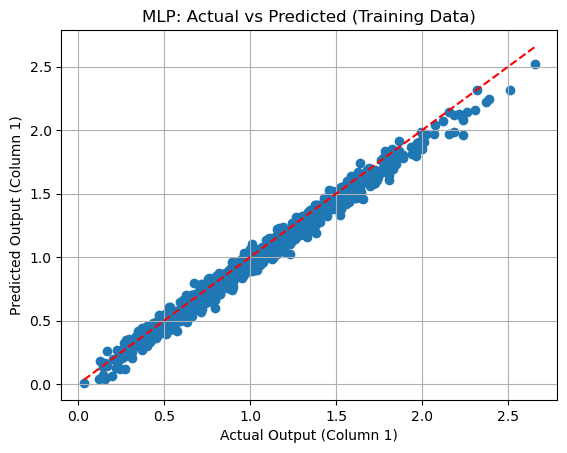

In [31]:
plt.scatter(new_outputs.iloc[:, 0], new_prediction[:, 0])
plt.grid(True)
plt.xlabel("Actual Output (Column 1)")
plt.ylabel("Predicted Output (Column 1)")
plt.title("MLP: Actual vs Predicted (Training Data)")
plt.plot([min(new_outputs.iloc[:, 0]), max(new_outputs.iloc[:, 0])], 
         [min(new_outputs.iloc[:, 0]), max(new_outputs.iloc[:, 0])], 
         color='red', linestyle='--') 
plt.show()

MSE values for each fold: [0.01754012 0.0179977  0.01827174 0.01813454 0.01874652 0.01889228
 0.01959868 0.01831987 0.01732309 0.01776782]
Mean MSE: 0.01825923515085561


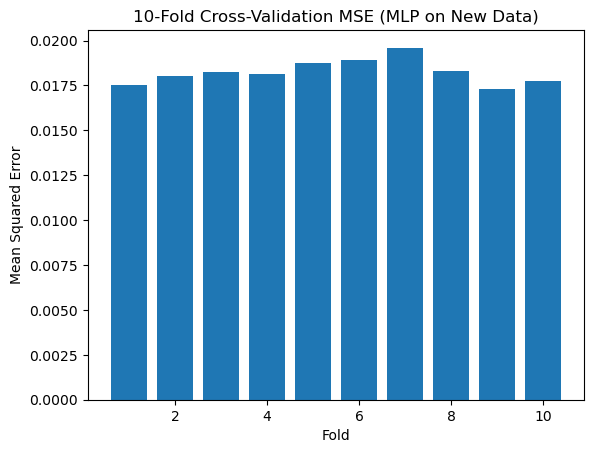

In [32]:
# Define K-Fold
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Run cross-validation on new data
scores = cross_val_score(model2, new_inputs, new_outputs, cv=cv, scoring='neg_mean_squared_error')

# Convert to positive MSE
mse_scores = -scores

# Print scores
print(f'MSE values for each fold: {mse_scores}')
print(f'Mean MSE: {np.mean(mse_scores)}')

# Plot
plt.bar(range(1, 11), mse_scores)
plt.xlabel('Fold')
plt.ylabel('Mean Squared Error')
plt.title('10-Fold Cross-Validation MSE (MLP on New Data)')
plt.show()



In [33]:
#PART B

In [34]:
from skimage import io
from skimage.transform import resize
import numpy as np
from scipy.ndimage import rotate
import matplotlib.pyplot as plt

# Load image
img = io.imread('Section A/Images/Group_B.png')

In [35]:
# Cell dimensions
cell_height = img.shape[0] // 6
cell_width = img.shape[1] // 9

My name is Navya Binoy, and I am slicing the image Group_B.png to extract my name


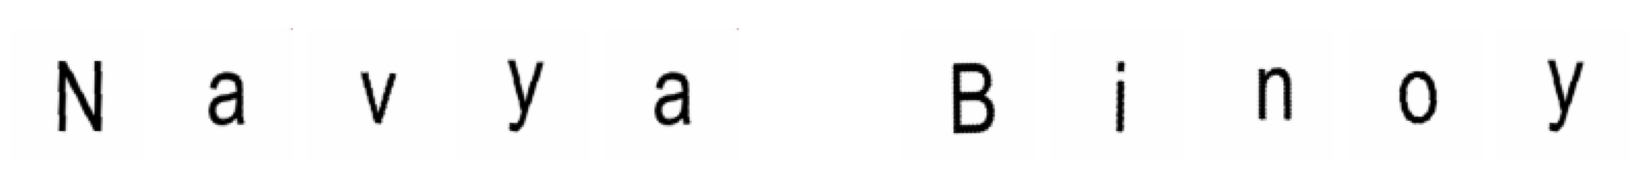

In [36]:
# Extract letter function
def extract_letter(img, rows, columns, cell_height, cell_width):
    y1 = rows * cell_height
    y2 = (rows + 1) * cell_height
    x1 = columns * cell_width
    x2 = (columns + 1) * cell_width
    return img[int(y1):int(y2), int(x1):int(x2)]

# Extract letters for "Navya Binoy"
letters = [
    extract_letter(img, 4, 6, cell_height, cell_width),  
    extract_letter(img, 4, 0, cell_height, cell_width),  
    extract_letter(img, 4, 2, cell_height, cell_width),  
    extract_letter(img, 1, 4, cell_height, cell_width),  
    extract_letter(img, 4, 0, cell_height, cell_width),  
    extract_letter(img, 5, 0, cell_height, cell_width),  
    extract_letter(img, 0, 2, cell_height, cell_width),  
    extract_letter(img, 3, 3, cell_height, cell_width),  
    extract_letter(img, 2, 1, cell_height, cell_width),  
    extract_letter(img, 1, 4, cell_height, cell_width)
]

# Rotation angles
angles = [-3, -28, -10, 1, -28, -13, -10, 18, -1, 1]

# Padding function
def pad_letter(letter_img, pad=20):
    return np.pad(letter_img, ((pad, pad), (pad, pad), (0, 0)), mode='constant', constant_values=255)

def crop_image(img, target_height, target_width):
    h, w, _ = img.shape
    start_y = (h - target_height) // 2
    start_x = (w - target_width) // 2
    return img[start_y:start_y+target_height, start_x:start_x+target_width]


# Process each letter
standard_size = (100, 100)
rotated_letters = []

for letter, angle in zip(letters, angles):
    padded = pad_letter(letter, pad=20)
    rotated = rotate(padded, angle, reshape=False, mode='constant', cval=255)
    # Resize larger, then center-crop to remove borders
    enlarged = resize(rotated, (120, 120), anti_aliasing=True, preserve_range=True).astype(np.uint8)
    cropped = crop_image(enlarged, 65, 65)
    rotated_letters.append(cropped)


# Add space between first and last names
space = np.ones((100, 30, 3), dtype=np.uint8) * 255
rotated_letters = rotated_letters[:5] + [space] + rotated_letters[5:]

# Display the result
fig, axes = plt.subplots(1, len(rotated_letters), figsize=(len(rotated_letters) * 1.5, 2))

for ax, letter_img in zip(axes, rotated_letters):
    ax.imshow(letter_img)
    ax.axis('off')

print("My name is Navya Binoy, and I am slicing the image Group_B.png to extract my name")
plt.tight_layout()
plt.show()
